# TP8 FREQUENTIST METHODS
Wednesday March 10, 2023

## 0 Impor

To install NLTK without being root, you will write
> pip install nltk --user
Then, to load the corpora we need, we will launch Python in interactive mode, and write:
```python
import nltk
nltk.download()
```
In the window that will open, choose “All” in “Collections” if you don’t have quota problems, or “Book,” and click on “Donwload”. Once you have finished the operation, to exit the interactive mode, press Ctrl-D

In [25]:
import pandas as pd
import random
import collections
import re
import nltk
from nltk.corpus import brown, names
from nltk.probability import FreqDist


nltk.download()



showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## 1 Some aspects of Brown’s corpus
The following modules will be used:
```python
import nltk
from nltk.corpus import brown
from nltk.probability import FreqDist
import re
```
Brown’s corpus tags are here : http://www.comp.leeds.ac.uk/amalgam/tagsets/brown.html.

*Questions and Answers:*
1. In Brown’s corpus, what nouns are more common in the plural than in the singular? (The plural is
considered to be formed simply by the addition of an “s”) Classify the first 20 results by frequency of the
plural form and by plural/singular ratio.
2. Which word has the greatest number of distinct tags? What do they represent?
3. List the tags in descending order of frequency (the first 20). What do they represent?
4. What are the most frequent tags of words preceding nouns? What do they represent?



In [7]:
for sent in brown.sents()[:2]:
    print(" ".join(sent))

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .
The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. .
`` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' .
The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' .


In [13]:
fdist = FreqDist(brown.tagged_words())

In [28]:
fnoun = {k[0]: v for k, v in fdist.items() if k[1] == 'NN' }
fnouns = {k[0]: v for k, v in fdist.items() if k[1] == 'NNS' }

df = pd.DataFrame(fnoun, index=['sng_count']).T
df['plu_count'] = 0
 
for key, value in fnouns.items():
    if key[:-1] in df.index:
        # print(key)
        df.loc[key[:-1], 'plu_count'] = value
        
df['ratio'] = df['plu_count']/df['sng_count']

In [30]:
df.sort_values('plu_count', ascending=False).head(20)

,sng_count,plu_count,ratio
year,641,939,1.464899
eye,119,391,3.285714
day,623,376,0.603531
thing,326,357,1.095092
member,133,310,2.330827
hand,410,284,0.692683
fee,16,283,17.687500
word,259,268,1.034749
time,1547,260,0.168067
problem,309,239,0.773463


In [31]:
df.sort_values('ratio', ascending=False).head(20)

,sng_count,plu_count,ratio
stair,2,46,23.000000
headquarter,1,19,19.000000
relative,1,19,19.000000
fee,16,283,17.687500
tear,2,32,16.000000
employe,1,15,15.000000
stockholder,2,26,13.000000
investor,1,11,11.000000
microorganism,1,11,11.000000
rib,1,11,11.000000


In [38]:
words = {}
for key, value in fdist.items():
    if key[0] not in words.keys():
        words[key[0]] = [key[1]]
    else:
        words[key[0]].append(key[1])

In [39]:
sorted(words.items(), key=lambda item: len(item[1]), reverse=True)[:1]

[('that',
  ['CS',
   'WPS',
   'DT',
   'QL',
   'WPO',
   'CS-HL',
   'DT-NC',
   'NIL',
   'WPS-NC',
   'WPO-NC',
   'CS-NC',
   'WPS-HL'])]

In [42]:
fdist

FreqDist({('the', 'AT'): 62288, (',', ','): 58153, ('.', '.'): 48812, ('of', 'IN'): 34864, ('and', 'CC'): 27676, ('a', 'AT'): 21824, ('in', 'IN'): 18975, ('to', 'TO'): 14679, ('to', 'IN'): 10903, ('is', 'BEZ'): 9976, ...})

In [48]:
tags = {}
for key, value in fdist.items():
    # print(key[1], type(value))
    if key[1] not in tags.keys():
        tags[key[1]] = value
    else:
        tags[key[1]] += value

In [50]:
sorted(tags.items(), key=lambda item: item[1], reverse=True)[:20]

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476),
 ('VB', 33693),
 ('VBN', 29186),
 ('VBD', 26167),
 ('CS', 22143),
 ('PPS', 18253),
 ('VBG', 17893),
 ('PP$', 16872),
 ('TO', 14918),
 ('PPSS', 13802),
 ('CD', 13510)]

In [57]:
len(brown.tagged_words())

1161192

In [ ]:
before = {}
for i, (word, tag) in enumerate(brown.tagged_words()):
    if tag in ['NN', 'NNS', 'NN$']:
        # print(i, word, tag)
        if brown.tagged_words()[i-1][1] not in before.keys():
            before[brown.tagged_words()[i-1][1]] = 1
        else:
            before[brown.tagged_words()[i-1][1]] += 1
            
    if (i+1)%11611==0:
        print(1161192/i, '%')

In [ ]:
sorted(before.items(), key=lambda item: item[1], reverse=True)

## 2 Evaluation of taggers
### 2.1 POS-based POS tags
In this section we will create taggers (the default tagger is nltk.DefaultTagger and the n-grams tagger1, nltk.NgramTagger), and we will train them using the news category from Brown’s corpus.

Evaluate taggers at n-grams (for n = 0, . . . , 6) by performing a tenfold cross-validation, with andwithout backoff.

Evaluate the same taggers with the simplified tag set.

In [75]:
brown_tagged_sentences = brown.tagged_sents(categories='news')
brown_sentences = brown.sents(categories='news')
tagger = [0,0,0,0,0,0,0,0]

tags = [t for (w,t) in brown.tagged_words(categories='news')]
maxtag = nltk.FreqDist(tags).max()
tagger[0] = nltk.DefaultTagger(maxtag)
default_eval = tagger[0].evaluate(brown_tagged_sentences)
test_size = int(len(brown_tagged_sentences) * 0.1)
evaluation = [default_eval,0,0,0,0,0,0,0]
print("WITHOUT BACKOFF:")
print("0-grams: " + str(default_eval))
for N in range(1,7):
   for C in range(10):
      if C==0:
         train_sents = brown_tagged_sentences[(C+1)*test_size:]
      else:
         train_sents = brown_tagged_sentences[:C*test_size] + brown_tagged_sentences[(C+1)*test_size:]
      test_sents = brown_tagged_sentences[C*test_size:(C+1)*test_size]
      tagger[N] = nltk.NgramTagger(N,train=train_sents)
      evaluation[N] += tagger[N].evaluate(test_sents)
   evaluation[N] /= 10
   print(str(N) + "-grams: " + str(evaluation[N]))
   
evaluationbo=[default_eval,0,0,0,0,0,0,0]

print("WITH BACKOFF:")
print("0-grams: " + str(default_eval))
for N in range(1,7):
   for C in range(10):
      if C==0:
         train_sents = brown_tagged_sentences[(C+1)*test_size:]
      else:
         train_sents = brown_tagged_sentences[:C*test_size] + brown_tagged_sentences[(C+1)*test_size:]
      test_sents = brown_tagged_sentences[C*test_size:(C+1)*test_size]
      tagger[N] = nltk.NgramTagger(N,train=train_sents,backoff=tagger[N-1])
      evaluationbo[N] += tagger[N].evaluate(test_sents)
   evaluationbo[N] /= 10
   print(str(N) + "-grams: " + str(evaluationbo[N]))

/var/folders/1d/g2nb11rn0gqg20js1nqct1r40000gn/T/ipykernel_27995/1244578707.py:8: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  default_eval = tagger[0].evaluate(brown_tagged_sentences)


WITHOUT BACKOFF:
0-grams: 0.13089484257215028


/var/folders/1d/g2nb11rn0gqg20js1nqct1r40000gn/T/ipykernel_27995/1244578707.py:21: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  evaluation[N] += tagger[N].evaluate(test_sents)


1-grams: 0.8080819695613455
2-grams: 0.10119360136867109
3-grams: 0.06322356284065468
4-grams: 0.05693468572955782
5-grams: 0.0556768020684553
6-grams: 0.05560703003714816
WITH BACKOFF:
0-grams: 0.13089484257215028


/var/folders/1d/g2nb11rn0gqg20js1nqct1r40000gn/T/ipykernel_27995/1244578707.py:37: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  evaluationbo[N] += tagger[N].evaluate(test_sents)


1-grams: 0.8313895367184309
2-grams: 0.9323461243091057
3-grams: 0.9561272040718384
4-grams: 0.9651135405091452
5-grams: 0.9730581836102621
6-grams: 0.9774925936360294


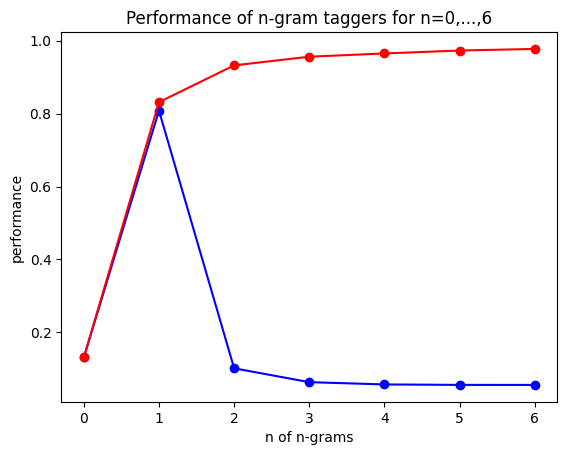

In [81]:
import matplotlib.pyplot as plt 

plt.plot(range(7), evaluation[:-1], '-bo')
plt.plot(range(7), evaluationbo[:-1], '-ro')
plt.title('Performance of n-gram taggers for n=0,...,6')
plt.xlabel('n of n-grams')
plt.ylabel('performance')
plt.show()

## 2.2 Given name gender tags based on intrinsic properties
In this section we will use modules
```py
import nltk
from nltk.corpus import names
import random
import collections
```

The names corpus consists of two files, female.txt and male.txt. Create a list of tuples (given name, gender) in a random order. Count the epicene mixed first names.

In the previous section we used words and tags. Here we will adopt a more general approach: we will define properties and we will evaluate the contribution of these properties to the classification task (in our case: the gender of a given name). 

**First candidate property:** the last letter.
```py
def gender_features(word):
    return {'last_letter': word[-1]}

featuresets = [(gender_features(n), g) for (n,g) in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))
```

What we get is accuracy. Calculate also the precision, recall and F-measure for each gender (use the homonymous methods of nltk.metrics, beware: to use these methods you have to gather the numbers of given names in lists, according to their rankings and their true gender). What do we find?

Using the method show_most_informative_features(10) of classify, we can find out the values of properties having the most discriminating power.

To have ideas of new properties to attempt, write the code that will display all the classification errors with, for each one, the correct class, the badly selected class and the name.

Test other properties and their combinations.

In [20]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

In [52]:
def gender_features(word):
    return {'last_letter': word[-1]}

male_names = names.words('male.txt')
female_names = names.words('female.txt')
Names = [(name, 'male') for name in male_names]
Names.extend([(name, 'female') for name in female_names])
random.shuffle(Names)

featuresets = [(gender_features(n), g) for (n, g) in Names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

0.81


In [61]:
predictions = classifier.classify_many([value[0] for value in test_set])
labels = [value[1] for value in test_set]

In [74]:
from sklearn.metrics import *



print(precision_score(predictions, labels, average="binary", pos_label="male"))
print(precision_score(predictions, labels, average="binary", pos_label="female"))
print(recall_score(predictions, labels, average="binary", pos_label="male"))
print(recall_score(predictions, labels, average="binary", pos_label="female"))

print(f1_score(predictions, labels, average="binary", pos_label="male"))
print(f1_score(predictions, labels, average="binary", pos_label="female"))

0.7241379310344828
0.8558282208588958
0.7283236994219653
0.8532110091743119
0.7262247838616714
0.8545176110260336


### 2.3 Return to POS, combined approach (intrinsic properties + n-grams)

In Section 2.1 we have created taggers trained on words as well as on a number of previous word tags. In Section 2.2 we have (for another classification task: it was not a matter of classifying by POS but only by gender) used intrinsic properties of words (described by regular expressions). In this section we will combine the two approaches for POS computation.

Let us start by creating a POS classifier based only on intrinsic properties of words: 1-, 2- and 3-suffixes.

What accuracy do we get?

Next, let us add more properties :
1. the current word,
2. the previous word,
3. the current word and the previous word,
4. 1–3 as well as the tag of the previous word, as predicted by the classifier,
5. idem but with the tags of the two previous words (as separate properties).
   
How does the performance of the classifier evolve?
To store the predicted tags, we can use a history list (at the level of each sentence)

## 3 Chunking, chinking

In the following we will do chunking by writing grammars. This will help us with an important branch of text mining, information extraction. We are going to get pronominal and verbal chunks, and by looking for patterns of chunks we will do relation extraction.

First of all, let us use the Regexp Chunk Parser App interface to practice writing regular expressions in order to describe chunks. The application gives us in real time, the values of accuracy, recall and F-measure obtained.

It gets displayed when we type
```python
import nltk
nltk.app.chunkparser()
```

Here is how to apply such a grammar, with chunk labels if necessary, to a small sentence: the/DT little/JJ yellow/JJ dog/NN barked/VBD at/IN the/DT cat/NN. We instantiate a parser by providing it with a grammar: it will therefore read the word tags and form chunks according to the grammar.
```python
import nltk, re
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
grammar = r"NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
print(result)
result.draw()
```

### 3.1 Evaluation of chunkers

The corpus conll2000 contains chunked sentences from the Wall Street Journal. It is already divided into a training set and a test set (files train.txt and test.txt).

We will start with an NP chunker based on a grammar as in the previous section:
```py
from nltk.corpus import conll2000
cp = nltk.RegexpParser("")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.evaluate(test_sents))
```
Execute it. How do you explain the result obtained? Write some rules to improve the result.
Another solution is to train a chunker. One can, for example, define
```py
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
        for sent in train_sents]
            self.tagger = nltk.UnigramTagger(train_data)
    def parse(self, sentence):
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag) in zip(sentence, chunktags)]
        return nltk.chunk.util.conlltags2tree(conlltags)
```

Here, conlltags2tree (and its inverse tree2conlltags) are used to switch from the IOB format of ConLL2000 to the tree format and vice versa.

Does this chunker involve words? Why is it a “unigram” tagger? Evaluate it, using the train.txt and test.txt files.

Write bigram and trigram taggers (without backoff, alas...) and compare the results.